<a href="https://colab.research.google.com/github/MickeyLeewells2020/Magic-The-Gathering-Rares-/blob/master/Magic_The_Gathering_cards_project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as  pd
import numpy as np
import plotly.express as px 
import seaborn as sns
import matplotlib.pyplot as plt


In [0]:
MTG = pd.read_csv('/content/MTG_cards.csv', index_col=0 ,dtype= 'str' )
# read in as a str to make it easier  coerce  columns

In [0]:
MTG.head() , MTG.tail()
# inspecting head and tail

In [0]:
MTG.isnull().sum()
# checking for nan vaules 

name                    0
lang                    0
released_at             0
mana_cost            7403
cmc                     0
type_line               0
oracle_text          1988
colors                266
color_identity          0
reserved                0
reprint                 0
set                     0
set_name                0
set_type                0
collector_number        0
digital                 0
rarity                  0
border_color            0
edhrec_rank          5227
power               26740
toughness           26740
promo_types         46137
loyalty             49656
dtype: int64

In [0]:
MTG.dtypes
# checking and verify dtypes

name                object
lang                object
released_at         object
mana_cost           object
cmc                 object
type_line           object
oracle_text         object
colors              object
color_identity      object
reserved            object
reprint             object
set                 object
set_name            object
set_type            object
collector_number    object
digital             object
rarity              object
border_color        object
edhrec_rank         object
power               object
toughness           object
promo_types         object
loyalty             object
dtype: object

In [0]:
mtg_ = MTG

In [0]:
print(mtg_['loyalty'].value_counts())
print(mtg_['power'].value_counts())
print(mtg_['toughness'].value_counts())

In [0]:
print(mtg_['loyalty'].dtypes)
print(mtg_['power'].dtypes)
print(mtg_['toughness'].dtypes)

object
object
object


In [0]:
mtg_['loyalty'] = mtg_['loyalty'].replace('1d4+1',0.2)
mtg_['loyalty'] = mtg_['loyalty'].replace('*',0.1)
mtg_['loyalty'] = mtg_['loyalty'].replace('X',0.1)
mtg_['toughness'] = mtg_['toughness'].replace('*',0.1)
mtg_['toughness'] = mtg_['toughness'].replace('1+*',0.2)
mtg_['toughness'] = mtg_['toughness'].replace('2+*',0.3)
mtg_['toughness'] = mtg_['toughness'].replace('?',0.4)
mtg_['toughness'] = mtg_['toughness'].replace('7-*',0.5)
mtg_['toughness'] = mtg_['toughness'].replace('*+1',0.6)
mtg_['toughness'] = mtg_['toughness'].replace('*²',0.7)
mtg_['power'] = mtg_['power'].replace('*',0.1)
mtg_['power'] = mtg_['power'].replace('1+*',0.2)
mtg_['power'] = mtg_['power'].replace('2+*',0.3)
mtg_['power'] = mtg_['power'].replace('?',0.4)
mtg_['power'] = mtg_['power'].replace('7-*',0.5)
mtg_['power'] = mtg_['power'].replace('*+1',0.6)
mtg_['power'] = mtg_['power'].replace('*²',0.7)
mtg_['power'] = mtg_['power'].replace('∞',0.8)
mtg_['rarity'] = mtg_['rarity'].replace('common',1)
mtg_['rarity'] = mtg_['rarity'].replace('uncommon',2)
mtg_['rarity'] = mtg_['rarity'].replace('rare',3)
mtg_['rarity'] = mtg_['rarity'].replace('mythic',4)

In [0]:
mtg_['rarity'].value_counts(normalize=True)

1    0.387890
3    0.298882
2    0.264238
4    0.048991
Name: rarity, dtype: float64

In [0]:
mtg_['promo_types'] = mtg_['promo_types'].fillna('NOT A PROMO')
mtg_['oracle_text'] = mtg_['oracle_text'].fillna('NO ORACLE TEXT ')
mtg_['oracle_text'] = mtg_['oracle_text'].astype('str')
mtg_['mana_cost'] = mtg_['mana_cost'].fillna('NMC')
mtg_['power'] = mtg_['power'].fillna('-1')
mtg_['power'] = mtg_['power'].astype('float')
mtg_['toughness'] = mtg_['toughness'].fillna(-1) 
mtg_['toughness'] = mtg_['toughness'].astype('float') 
mtg_['loyalty'] = mtg_['loyalty'].fillna(-1)
mtg_['loyalty'] = mtg_['loyalty'].astype('float')
mtg_['colors'] = mtg_['colors'].fillna('[NAN]')
mtg_['edhrec_rank'] = mtg_['edhrec_rank'].fillna(-1)
mtg_['edhrec_rank'] = mtg_['edhrec_rank'].astype('float')


In [0]:
mtg_.dtypes

name                 object
lang                 object
released_at          object
mana_cost            object
cmc                  object
type_line            object
oracle_text          object
colors               object
color_identity       object
reserved             object
reprint              object
set                  object
set_name             object
set_type             object
collector_number     object
digital              object
rarity                int64
border_color         object
edhrec_rank         float64
power               float64
toughness           float64
promo_types          object
loyalty             float64
dtype: object

In [0]:
mtg_c = mtg_

In [0]:
def length_O_Text(str):
    counter = 0    
    for i in str: 
        counter += 1
    return counter 
  
  
str = mtg_['name'][0]
print(length_O_Text(str)) 

7


In [0]:
len(mtg_['oracle_text'])

50254

In [0]:
name_count = mtg_c['name'].apply(length_O_Text)

In [0]:
o_text_count =  mtg_c['oracle_text'].apply(length_O_Text)

In [0]:
name_count.describe()

count    50254.000000
mean        14.330700
std          5.215441
min          1.000000
25%         11.000000
50%         14.000000
75%         17.000000
max        141.000000
Name: name, dtype: float64

In [0]:
o_text_count.describe()

count    50254.000000
mean       125.397381
std         86.581130
min          5.000000
25%         60.000000
50%        111.000000
75%        177.000000
max        769.000000
Name: oracle_text, dtype: float64

In [0]:
o_text_count

0         57
1        176
2         81
3         15
4        226
        ... 
50249    101
50250    326
50251    215
50252     18
50253     73
Name: oracle_text, Length: 50254, dtype: int64

In [0]:
mtg_c['oracle_text_count'] = o_text_count
mtg_c['name_text_count'] = name_count

In [0]:
mtg_c = mtg_c.drop(['name','lang','oracle_text'] , axis=1)

In [0]:
mtg_c.to_csv('mtg_c.csv')

In [0]:
px.scatter_3d(mtg_c ,x='rarity', y='power',z='cmc')

In [0]:
!pip install category_encoders
!pip install pandas-profiling==2.*

In [0]:
from pandas_profiling import profile_report

In [0]:
mtg_c.profile_report()

In [0]:
# Choose a feature and plot it versus target
# rarity vs cmc
import plotly.express as px
px.box(mtg_c, x='rarity', y='oracle_text_count')


In [0]:
px.bar(mtg_c, x= 'rarity',y='cmc')

In [0]:
mtg_c['rarity'].value_counts(normalize=True)

In [1]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(
    ce.OrdinalEncoder(),
)

NameError: ignored

In [0]:
# train, test = train_test_split(
#     mtg_c, train_size=0.75, test_size=0.25, random_state=42)

# target = 'rarity'
# features = train.columns.drop(target)
# X_train = train[features]
# y_train = train[target]
# X_test = test[features]
# y_test = test[target]

# X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [0]:
# Fit model 
# model.fit(X_train, y_train)
# my data and  my target are catergorical  linear regession wont work with 
# out more  feature  engineering

In [0]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.pipeline import make_pipeline
from scipy.stats import uniform
import category_encoders as ce
target='rarity'
features = mtg_c.columns.drop(target)

In [0]:




train = mtg_c
test = train[features]
train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train['rarity'], random_state=17)


def wrangle(X):
    """Wrangle train, validate, and test sets in the same way"""
    
    # Prevent SettingWithCopyWarning
    X = X.copy()


    
    

    return X

train = wrangle(train)
val = wrangle(val)
test = wrangle(test)

In [0]:

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

In [0]:
# checking shape
X_val.shape, y_val.shape

In [0]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(),
    RandomForestClassifier(random_state=17,) 
)

param_distributions = {
    'randomforestclassifier__n_estimators': range(50, 500), 
    'randomforestclassifier__max_depth': [5, 10, 15, 20, None], 
    'randomforestclassifier__max_features': uniform(0, 1), 
    'randomforestclassifier__min_samples_leaf': [10, 100, 1000]
}

In [0]:
pipeline.fit(X_train,y_train)

In [0]:
pipeline.score(X_val,y_val)

In [0]:
search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_distributions,
    n_iter=10,
    cv=3,
    scoring='accuracy',
    verbose=10,
    return_train_score=True,
    n_jobs=-1
)
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['released_at', 'mana_cost', 'cmc',
                                      'type_line', 'colors', 'color_identity',
                                      'reserved', 'reprint', 'set', 'set_name',
                                      'set_type', 'collector_number', 'digital',
                                      'border_color', 'promo_types'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'released_at',
                                          'data_ty...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
    

In [0]:
%time
# refittiing original model after  re engineering data
search.fit(X_train,y_train)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   26.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  5.6min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('ordinalencoder',
                                              OrdinalEncoder(cols=['released_at',
                                                                   'mana_cost',
                                                                   'cmc',
                                                                   'type_line',
                                                                   'colors',
                                                                   'color_identity',
                                                                   'reserved',
                                                                   'reprint',
                                                                   'set',
                                                                   'set_name',
                                                       

In [0]:
search.best_score_

0.7092008059100067

In [0]:
from xgboost import XGBRFClassifier

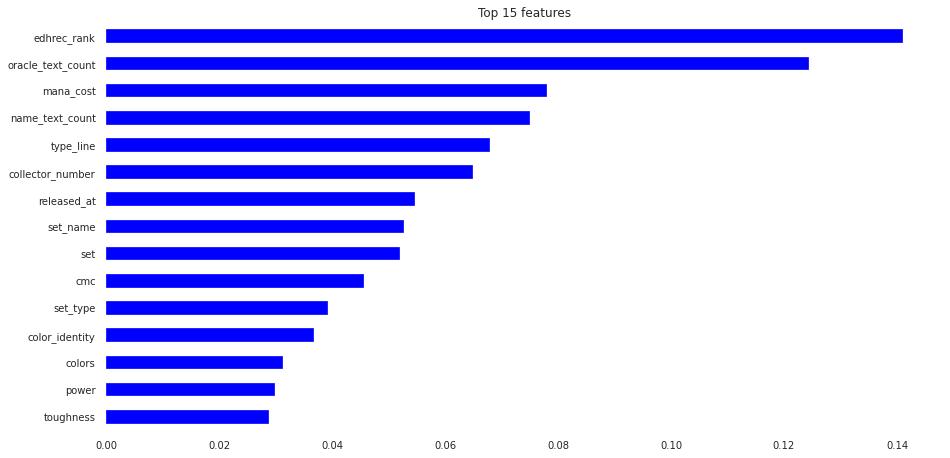

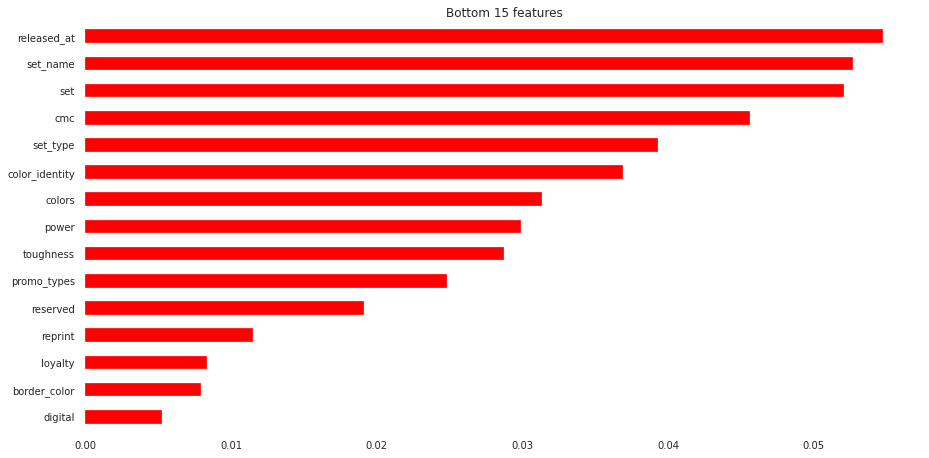

In [0]:
mt = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(mt.feature_importances_, X_train.columns)

n = 15
plt.figure(figsize = (15, n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='blue')

n = 15
plt.figure(figsize = (15, n/2))
plt.title(f'Bottom {n} features')
importances.sort_values()[:n].plot.barh(color='red');

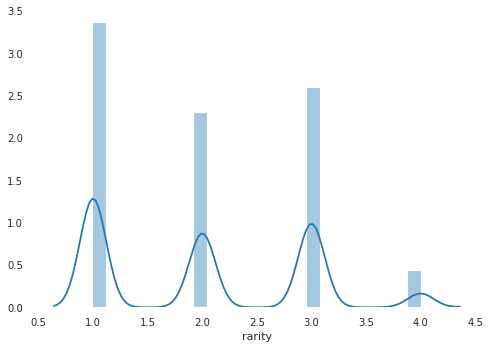

In [0]:
import seaborn as sns
sns.distplot(y_train)

In [0]:
! pip install pdpbox
! pip install shap

     |████████████████████████████████| 57.7MB 75kB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.0-cp36-none-any.whl size=57690722 sha256=06bd34df9cb9a59591955f2bbf4a10be6380c857ba975b24297d3c8295021af7
  Stored in directory: /root/.cache/pip/wheels/7d/08/51/63fd122b04a2c87d780464eeffb94867c75bd96a64d500a3fe
Successfully built pdpbox
     |████████████████████████████████| 276kB 2.0MB/s 
  Created wheel for shap: filename=shap-0.35.0-cp36-cp36m-linux_x86_64.whl size=394115 sha256=c3f03dd0176ca42bbfe08d406952a450ba49c85a3681727e1d828829bbdab873
  Stored in directory: /root/.cache/pip/wheels/e7/f7/0f/b57055080cf8894906b3bd3616d2fc2bfd0b12d5161bcb24ac
Successfully built shap


In [0]:
from pdpbox.pdp import pdp_isolate, pdp_plot